# Network analysis coursework code

Importing the dataframe (Parameters_Tet.csv) and setting the first two columns as categorical data. Change according to your file name and data column headings

In [32]:
import pandas as pd
from pandas import DataFrame

data = pd.read_csv("Parameters_Tet.csv")
data["Clade"] = data["Clade"].astype("category")
data["Taxon"] = data["Taxon"].astype("category")
data.head()

,Taxon,Clade,Bone Number,Links,Density,Clustering,Path Length,Heterogeneity,Assortativity,Parcellation
0,Ichthyostega,Early Tetrapod,56,148,0.096104,0.390774,2.990260,0.383018,-0.276021,0.764668
1,Acanthostega,Early Tetrapod,55,152,0.102357,0.391938,2.872054,0.399811,0.062131,0.806612
2,Seymouria,Early Tetrapod,56,144,0.093506,0.382497,3.055195,0.326272,-0.120269,0.761480
3,Captorhinus,Early Tetrapod,51,122,0.095686,0.369448,2.994510,0.439061,-0.081101,0.747405
4,Epicrionops,Lissamphibian,23,51,0.201581,0.593162,2.047431,0.629856,-0.366071,0.775047


Creating an additional data frame with categorical data removed for correlationa analysis, which does not permit categorical data

In [33]:
Parameters = data[["Bone Number","Links","Density","Clustering", "Path Length", "Heterogeneity", "Parcellation"]]
Parameters.head()

,Bone Number,Links,Density,Clustering,Path Length,Heterogeneity,Parcellation
0,56,148,0.096104,0.390774,2.990260,0.383018,0.764668
1,55,152,0.102357,0.391938,2.872054,0.399811,0.806612
2,56,144,0.093506,0.382497,3.055195,0.326272,0.761480
3,51,122,0.095686,0.369448,2.994510,0.439061,0.747405
4,23,51,0.201581,0.593162,2.047431,0.629856,0.775047


## Linear regression for density to test the relationship between bone number and complexity

 Import the linear regression model from sklearn and set the model to linear. we do not expect a 0:0 relationship so fit_intercept is set to false.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

Now a linear model is used to fit a regression line on the data. The independent variable is the number of bones in a network and the dependent varibale is density, the measure of complexity used in the study. Upper and lower limits of node number for x_fit values are specific to this data and should be changed to match any data you use.

In [4]:
X = Parameters[["Bone Number"]] #X must be a data frame
y = Parameters["Density"]   #y must be a series

model.fit(X, y)

x_fit = pd.DataFrame({"Bone Number": [16, 56]})
y_pred = model.predict(x_fit)

To plot this regression line use the graphical commands from matplotlib, which must first be imported using the code below.

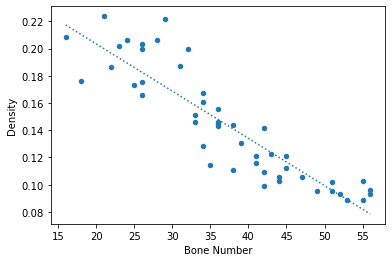

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data.plot.scatter("Bone Number", "Density", ax=ax)
ax.plot(x_fit["Bone Number"], y_pred, linestyle=":")

### Assessing model fit

To measure the fit of the model, a training dataset and test dataset made from subsamples of the complete dataset are compared. This command, train_test_split, is imported from sklearn. The variables used are X and y from the code above. Random state is set to ensure reproducability in the training and test datasets.

In [6]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

The distribution of training and test data can be visualised using the code below.

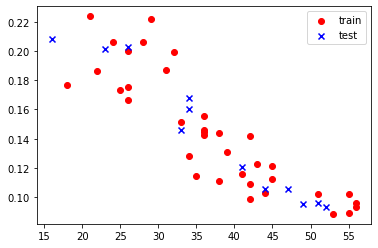

In [7]:
fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

A linear model is fitted to the training dataset

In [8]:
model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

This model is compared to the test data to produce a R-squared value of model fit, to be displayed below

In [9]:
model.score(test_X, test_y)

0.9369704270433946

### Plotting the relationship

Seaborn is a graphical pack that allows for better looking plots. The code belw plots Density against bone number and denotes clades using both the hue and style arguments. This code can be adapted to plot therelationship between any of the network parameters (see sections below). The regression line calculated above can also be overlaid onto the graph using plt.plot. Finally, the figure is saved into the workingdirectory as a PNG. File path and file type can be changed by modifying the name of the file to be saved e.g. ('computer/documents/filepath/Graph_name.jpg')

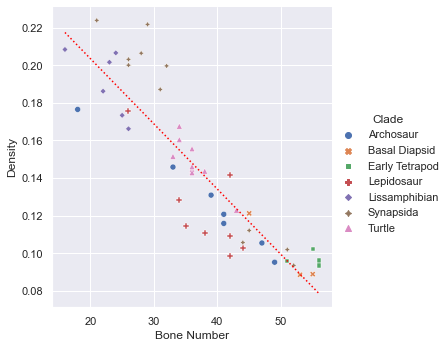

In [10]:
import seaborn as sns
sns.set_theme()

g = sns.relplot(data = data, x = "Bone Number", y = "Density", hue = "Clade", style = "Clade")
plt.plot(x_fit["Bone Number"], y_pred, linestyle=":", color = "red")
g.savefig('Density.png')

## Testing the correlation between other network variables

The first line uses the .corr command to measure the correlation between each varibale in the dataset. Note the use of the "Parameters" dataframe that contains no categorical data. The following lines plot the heatmap, highlighting the strongest positive and negative correlations between variables.

<AxesSubplot:>

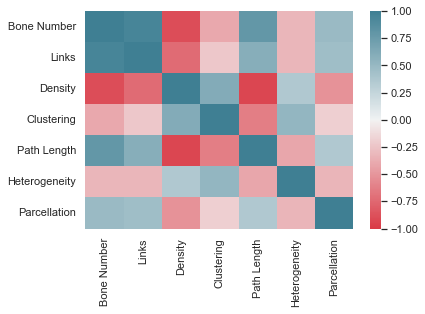

In [11]:
corr = Parameters.corr()

cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap=cmap)

## Investigating the correlations of specific variables

The code below investigates the correlation between bone number and two chosen network parameters, path length and parcellation, using linear model fitting. This code is identical to the annotated example with density above, and can be modified to investgate any variable.

### Bone number versus average path length

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


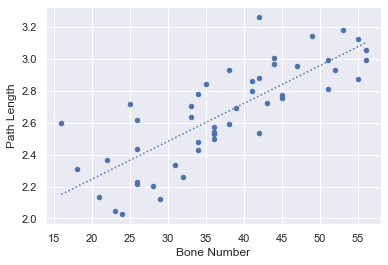

In [12]:
X = Parameters[["Bone Number"]] #X must be a data frame
y = Parameters["Path Length"]   #y must be a series

model.fit(X, y)

x_fit = pd.DataFrame({"Bone Number": [16, 56]})
y_pred = model.predict(x_fit)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data.plot.scatter("Bone Number", "Path Length", ax=ax)
ax.plot(x_fit["Bone Number"], y_pred, linestyle=":")

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

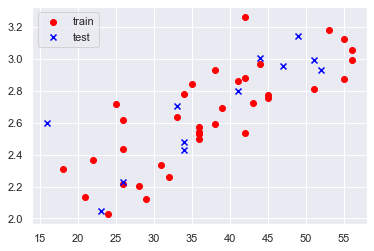

In [14]:
fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

In [15]:
model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

In [16]:
model.score(test_X, test_y)

0.6432480591724593

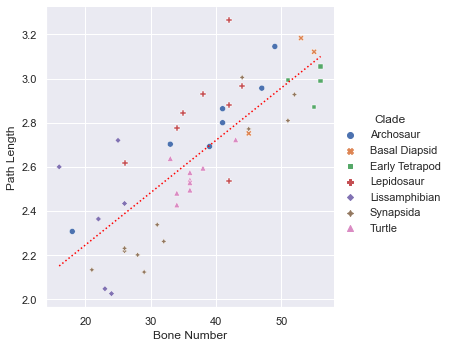

In [17]:
g = sns.relplot(data = data, x = "Bone Number", y = "Path Length", hue = "Clade", style = "Clade")
plt.plot(x_fit["Bone Number"], y_pred,linestyle=":", color = "red")
g.savefig('Path length.png')

### Bone number versus parcellation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


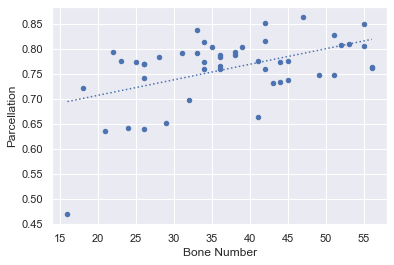

In [18]:
X = Parameters[["Bone Number"]] #X must be a data frame
y = Parameters["Parcellation"]   #y must be a series

model.fit(X, y)

x_fit = pd.DataFrame({"Bone Number": [16, 56]})
y_pred = model.predict(x_fit)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data.plot.scatter("Bone Number", "Parcellation", ax=ax)
ax.plot(x_fit["Bone Number"], y_pred, linestyle=":")

In [19]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

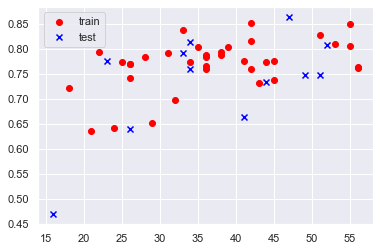

In [20]:
fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

In [21]:
model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

In [22]:
model.score(test_X, test_y)

0.10932316151233201

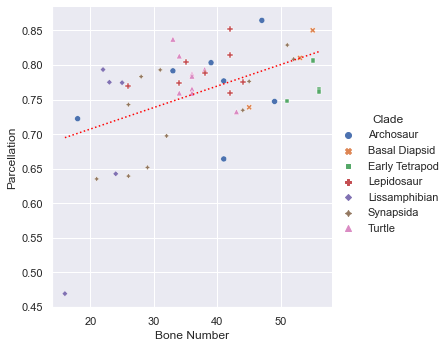

In [23]:
g = sns.relplot(data = data, x = "Bone Number", y = "Parcellation", hue = "Clade", style = "Clade")
plt.plot(x_fit["Bone Number"], y_pred,linestyle=":", color = "red")
g.savefig('Parcellation.png')

## Principal component analysis of all network parameters

The command to carry out Principal Component Analysis is imported from sklearn

In [24]:
from sklearn.decomposition import PCA

Similarly to earlier code, a training and test dataset will be created. This time however, the y variable will be the categorical variable that splits the data, since this data must be displayed on the final plot.

In [25]:
X = Parameters
y = data["Clade"]

Once again, use train_test_split to create training and test data subsamples.

In [26]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=10)

The following code scaled the data to the unit variance in order to create standardised PC axes

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaled_pca_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=3),
    KNeighborsClassifier()
)

This code tests the fit of the scaled training data against the scaled test data to return a list of the contribution of each PC axis to total variance. The length of this list, and therefore the number of PC axes shown within, can be adjusted by modifying the n_components argument in the code above. In this example, the first PC axis represents 63.3% of the data, the second axis represents 15.3% and the thrid axis represents 10.4%.

In [28]:
scaled_pca_knn.fit(train_X, train_y)
scaled_pca_knn.score(test_X, test_y)

print(scaled_pca_knn["pca"].explained_variance_ratio_)

[0.63254588 0.15328407 0.10444385]


### Plotting the distribution of taxa in PC space

The following code puts the parameters dataset into a scaled format that and then passes it through principal component analysis ready to be plotted.

In [29]:
scaled = scaled_pca_knn["standardscaler"].transform(Parameters)
X_reduced = scaled_pca_knn["pca"].transform(scaled)

This code plots the positions of each taxon in PC space, in this case for PC 1 and 2. The PC axes used can be altered by adjusting the column nuber in the X_reduced[:, ?] variable for the x and y arguments. The labels of the axes are set using the .set_lables commands and the figure is then printed as a PNG using the .savefig command

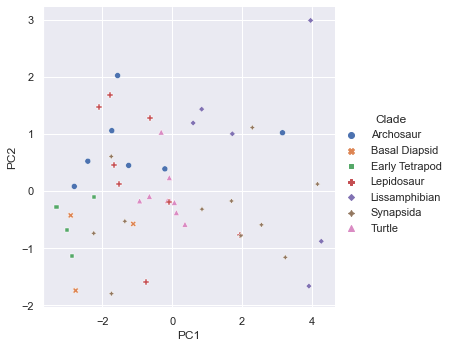

In [30]:
a = sns.relplot( x = X_reduced[:, 0],
    y = X_reduced[:, 1], hue=y, style = y)
a.set_ylabels("PC2", clear_inner=False)
a.set_xlabels("PC1", clear_inner=False)

a.savefig('PCA.png')